## Playing around with dataset to get familiar

### Import the dataset

In [68]:
from datasets import Dataset, load_dataset
from PIL import Image
import numpy as np

import matplotlib.pyplot as plt

# Load the Arrow file directly into a dataset
train_dataset = Dataset.from_file("../datasets/huggingface/mri_segmentation_dataset/train/data-00000-of-00001.arrow")
test_dataset = Dataset.from_file("../datasets/huggingface/mri_segmentation_dataset/test/data-00000-of-00001.arrow")

DatasetDict({
    train: Dataset({
        features: ['image', 'annotation'],
        num_rows: 400
    })
    test: Dataset({
        features: ['image', 'annotation'],
        num_rows: 100
    })
    valid: Dataset({
        features: ['image', 'annotation'],
        num_rows: 200
    })
})


### Test the dataset

In [61]:
# Access the image data from the dataset
image_data = np.array(train_dataset[142]["image"])  # Assuming image data is stored as a numpy array
annotation_data = np.array(train_dataset[142]["annotation"])

# Convert the numpy array to an image
img = Image.fromarray(image_data)
annotation = Image.fromarray(annotation_data)

#### Convert images to grayscale and display

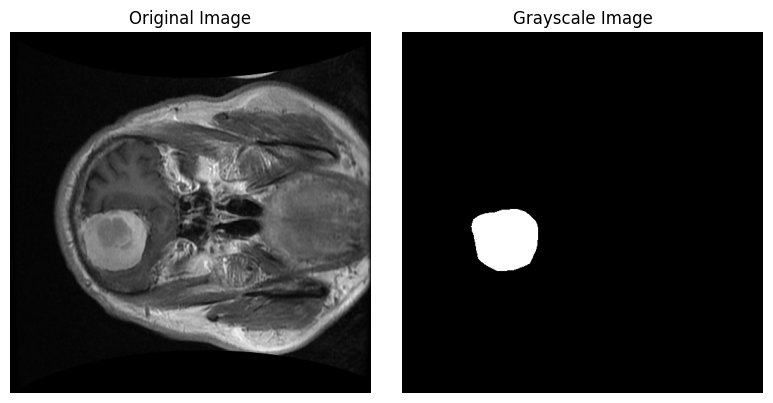

In [62]:
# Display the image
plt.figure(figsize=(8,4))

plt.subplot(1,2,1)
plt.imshow(img, cmap='gray')
plt.axis('off')
plt.title('Original Image')

plt.subplot(1,2,2)
plt.imshow(annotation, cmap='gray')
plt.axis('off')
plt.title('Grayscale Image')

plt.tight_layout()
plt.show()

### Preprocess images

In [67]:
# Define a function to preprocess images
def preprocess_image(image_data, target_size):
    # Convert image data to numpy array
    image_array = np.array(image_data)

    # Resize the image to the target size
    image = Image.fromarray(image_array)
    image = image.resize(target_size)

    # Normalize pixel values to range [0, 1]
    image = np.array(image) / 255.0

    return image

target_size = (512, 512)
preprocessed_images = []
for i in range(len(train_dataset)):
    image_data = train_dataset[i]['image']
    preprocessed_image = preprocess_image(image_data, target_size)
    preprocessed_images.append(preprocessed_image)

# Convert preprocessed images to NumPy array
X_train = np.array(preprocessed_images)

preprocessed_images = []
for i in range(len(test_dataset)):
    image_data = test_dataset[i]['image']
    preprocessed_image = preprocess_image(image_data, target_size)
    preprocessed_images.append(preprocessed_image)

X_test = np.array(preprocessed_images)